In [26]:
import pandas as pd
import numpy as np

#sample dataset
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 65, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'TotalPurchases': np.random.randint(1, 101, size=100),
    'ItemsPurchased': np.random.randint(1, 21, size=100),
    'SurveyResponse': np.random.choice(['Satisfied', 'Neutral', 'Dissatisfied'], size=100),
}

df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['Gender','SurveyResponse'], drop_first=True)

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Age  TotalPurchases  ItemsPurchased  Gender_Male  \
0           1   33              94               1            0   
1           2   54              94              15            0   
2           3   41              66               8            1   
3           4   54              54              16            0   
4           5   46              27              20            0   

   SurveyResponse_Neutral  SurveyResponse_Satisfied  
0                       0                         0  
1                       0                         0  
2                       0                         0  
3                       0                         0  
4                       0                         1  


In [27]:
df

,CustomerID,Age,TotalPurchases,ItemsPurchased,Gender_Male,SurveyResponse_Neutral,SurveyResponse_Satisfied
0,1,33,94,1,0,0,0
1,2,54,94,15,0,0,0
2,3,41,66,8,1,0,0
3,4,54,54,16,0,0,0
4,5,46,27,20,0,0,1
...,...,...,...,...,...,...,...
95,96,38,38,11,1,1,0
96,97,54,52,18,1,1,0
97,98,22,63,17,1,0,0
98,99,35,44,12,1,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CustomerID                100 non-null    int64
 1   Age                       100 non-null    int32
 2   TotalPurchases            100 non-null    int32
 3   ItemsPurchased            100 non-null    int32
 4   Gender_Male               100 non-null    uint8
 5   SurveyResponse_Neutral    100 non-null    uint8
 6   SurveyResponse_Satisfied  100 non-null    uint8
dtypes: int32(3), int64(1), uint8(3)
memory usage: 2.4 KB


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df.drop('SurveyResponse_Neutral', axis=1)
y = df['SurveyResponse_Neutral']

In [31]:
classifier = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision_micro))
print("Recall: {:.2f}".format(recall_micro))
print("F1-Score: {:.2f}".format(f1_micro))

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-Score: 0.80


In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision_macro))
print("Recall: {:.2f}".format(recall_macro))
print("F1-Score: {:.2f}".format(f1_macro))

Accuracy: 0.80
Precision: 0.71
Recall: 0.78
F1-Score: 0.73


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains your feature data and y contains the sales target variable
X = df.drop('ItemsPurchased', axis=1)
y = df['ItemsPurchased']

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the regression model's performance using relevant metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R^2): {:.2f}".format(r2))


Mean Squared Error (MSE): 47.90
R-squared (R^2): -0.14


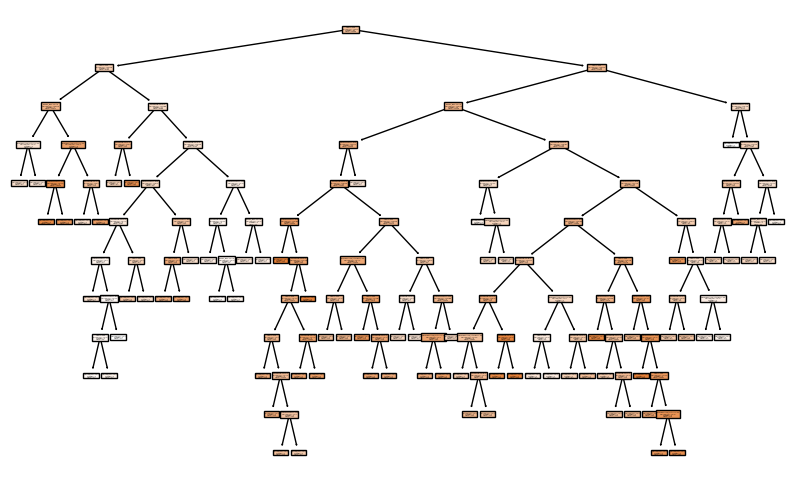

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define a list of feature names
feature_names = ['CustomerID', 'Age', 'TotalPurchases', 'Gender_Male', 'SurveyResponse_Neutral', 'SurveyResponse_Satisfied']

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(regressor, feature_names=feature_names, filled=True)
plt.show()


In [37]:
# Assuming 'classifier' is your decision tree classifier
feature_importance = classifier.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Sort features by importance (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features for classification:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")


Most important features for classification:
SurveyResponse_Satisfied: 0.27
TotalPurchases: 0.22
CustomerID: 0.21
Age: 0.19
Gender_Male: 0.11
SurveyResponse_Neutral: 0.00


In [38]:
# Assuming 'regressor' is your decision tree regressor
feature_importance = regressor.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Sort features by importance (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features for regression:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")


Most important features for regression:
Age: 0.34
CustomerID: 0.28
TotalPurchases: 0.26
Gender_Male: 0.08
SurveyResponse_Neutral: 0.04
SurveyResponse_Satisfied: 0.01
